In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
col_names = "#Uploaded_variation	Location	Allele	Consequence	IMPACT	SYMBOL	Gene	Feature_type	Feature	BIOTYPE	EXON	INTRON	HGVSc	HGVSp	cDNA_position	CDS_position	Protein_position	Amino_acids	Codons	Existing_variation	REF_ALLELE	UPLOADED_ALLELE	DISTANCE	STRAND	FLAGS	SYMBOL_SOURCE	HGNC_ID	gnomADe_AF	gnomADe_AFR_AF	gnomADe_AMR_AF	gnomADe_ASJ_AF	gnomADe_EAS_AF	gnomADe_FIN_AF	gnomADe_NFE_AF	gnomADe_OTH_AF	gnomADe_SAS_AF	gnomADg_AF	gnomADg_AFR_AF	gnomADg_AMI_AF	gnomADg_AMR_AF	gnomADg_ASJ_AF	gnomADg_EAS_AF	gnomADg_FIN_AF	gnomADg_MID_AF	gnomADg_NFE_AF	gnomADg_OTH_AF	gnomADg_SAS_AF	CLIN_SIG	SOMATIC	PHENO"
col_names = col_names.split()

In [8]:
var_info_df = pd.read_csv("../gnomad_var_freqs.tsv", sep="\t", na_values=[".", "-"], comment="#",
                          names=col_names, header=None)
var_info_df.head()

,#Uploaded_variation,Location,Allele,Consequence,IMPACT,SYMBOL,Gene,Feature_type,Feature,BIOTYPE,...,gnomADg_ASJ_AF,gnomADg_EAS_AF,gnomADg_FIN_AF,gnomADg_MID_AF,gnomADg_NFE_AF,gnomADg_OTH_AF,gnomADg_SAS_AF,CLIN_SIG,SOMATIC,PHENO
0,NaN,1:930248-930248,A,upstream_gene_variant,MODIFIER,SAMD11,ENSG00000187634,Transcript,ENST00000341065,protein_coding,...,0.001728,0.000192,0.002259,0.02532,0.005437,0.00478,0.002275,likely_benign,NaN,1
1,NaN,1:930248-930248,A,missense_variant,MODERATE,SAMD11,ENSG00000187634,Transcript,ENST00000342066,protein_coding,...,0.001728,0.000192,0.002259,0.02532,0.005437,0.00478,0.002275,likely_benign,NaN,1
2,NaN,1:930248-930248,A,missense_variant,MODERATE,SAMD11,ENSG00000187634,Transcript,ENST00000437963,protein_coding,...,0.001728,0.000192,0.002259,0.02532,0.005437,0.00478,0.002275,likely_benign,NaN,1
3,NaN,1:930248-930248,A,missense_variant,MODERATE,SAMD11,ENSG00000187634,Transcript,ENST00000616016,protein_coding,...,0.001728,0.000192,0.002259,0.02532,0.005437,0.00478,0.002275,likely_benign,NaN,1
4,NaN,1:930248-930248,A,missense_variant,MODERATE,SAMD11,ENSG00000187634,Transcript,ENST00000616125,protein_coding,...,0.001728,0.000192,0.002259,0.02532,0.005437,0.00478,0.002275,likely_benign,NaN,1


In [9]:
var_info_df = var_info_df.astype({col_name: float for col_name in var_info_df.columns if col_name.startswith("gnom")})
var_info_df.head()

,#Uploaded_variation,Location,Allele,Consequence,IMPACT,SYMBOL,Gene,Feature_type,Feature,BIOTYPE,...,gnomADg_ASJ_AF,gnomADg_EAS_AF,gnomADg_FIN_AF,gnomADg_MID_AF,gnomADg_NFE_AF,gnomADg_OTH_AF,gnomADg_SAS_AF,CLIN_SIG,SOMATIC,PHENO
0,NaN,1:930248-930248,A,upstream_gene_variant,MODIFIER,SAMD11,ENSG00000187634,Transcript,ENST00000341065,protein_coding,...,0.001728,0.000192,0.002259,0.02532,0.005437,0.00478,0.002275,likely_benign,NaN,1
1,NaN,1:930248-930248,A,missense_variant,MODERATE,SAMD11,ENSG00000187634,Transcript,ENST00000342066,protein_coding,...,0.001728,0.000192,0.002259,0.02532,0.005437,0.00478,0.002275,likely_benign,NaN,1
2,NaN,1:930248-930248,A,missense_variant,MODERATE,SAMD11,ENSG00000187634,Transcript,ENST00000437963,protein_coding,...,0.001728,0.000192,0.002259,0.02532,0.005437,0.00478,0.002275,likely_benign,NaN,1
3,NaN,1:930248-930248,A,missense_variant,MODERATE,SAMD11,ENSG00000187634,Transcript,ENST00000616016,protein_coding,...,0.001728,0.000192,0.002259,0.02532,0.005437,0.00478,0.002275,likely_benign,NaN,1
4,NaN,1:930248-930248,A,missense_variant,MODERATE,SAMD11,ENSG00000187634,Transcript,ENST00000616125,protein_coding,...,0.001728,0.000192,0.002259,0.02532,0.005437,0.00478,0.002275,likely_benign,NaN,1


In [10]:
var_info_df.Location.isna().any()

False

In [11]:
var_test_df = var_info_df.groupby("Location").nunique()
np.any(var_test_df.Allele != 1)

True

In [12]:
locations_of_interest = var_test_df.index[var_test_df.Allele != 1]
var_info_df[var_info_df.Location.isin(locations_of_interest)].groupby("Location")["Allele"].unique().head()

Location
10:104060270-104060270    [C, G]
10:113604793-113604793    [G, T]
10:114286234-114286234    [A, C]
10:126330456-126330456    [A, G]
10:126461491-126461491    [A, T]
Name: Allele, dtype: object

consequently, I know that some of the variants are multiallelic

In [13]:
var_test_df = var_info_df.groupby(["Location", "Allele"]).nunique().reset_index([0, 1])
cols_of_interest = [col_name for col_name in var_info_df.columns if col_name.startswith("gnom")]
np.any(var_test_df[cols_of_interest] > 1)

False

In [14]:
cols_of_interest = ["Location", "Allele"] + [col_name for col_name in var_info_df.columns if col_name.startswith("gnom")]
var_info_df = var_info_df[cols_of_interest]
var_info_df = var_info_df.drop_duplicates()
var_info_df.head()

,Location,Allele,gnomADe_AF,gnomADe_AFR_AF,gnomADe_AMR_AF,gnomADe_ASJ_AF,gnomADe_EAS_AF,gnomADe_FIN_AF,gnomADe_NFE_AF,gnomADe_OTH_AF,...,gnomADg_AFR_AF,gnomADg_AMI_AF,gnomADg_AMR_AF,gnomADg_ASJ_AF,gnomADg_EAS_AF,gnomADg_FIN_AF,gnomADg_MID_AF,gnomADg_NFE_AF,gnomADg_OTH_AF,gnomADg_SAS_AF
0,1:930248-930248,A,0.003583,0.000767,0.002423,0.002275,0.000000,0.002609,0.005292,0.007525,...,0.000868,0.000000,0.004972,0.001728,0.000192,0.002259,0.025320,0.005437,0.004780,0.002275
10,1:930282-930282,A,0.000257,0.003710,0.000060,0.000000,0.000000,0.000000,0.000019,0.000173,...,0.002992,0.000000,0.000262,0.000000,0.000000,0.000000,0.000000,0.000029,0.000955,0.000000
20,1:930285-930285,A,0.000780,0.000067,0.000864,0.009106,0.000393,0.000051,0.000431,0.001731,...,0.000024,0.003289,0.000589,0.009516,0.000000,0.000000,0.003165,0.000382,0.000478,0.000000
30,1:931042-931042,T,0.001420,0.015820,0.001330,0.001395,0.000000,0.000000,0.000292,0.001145,...,0.015220,0.000000,0.005691,0.000576,0.000000,0.000000,0.000000,0.000206,0.008126,0.000000
40,1:931049-931049,T,0.000104,0.000124,0.000000,0.000000,0.000000,0.000000,0.000212,0.000000,...,0.000048,0.000000,0.000131,0.000000,0.000000,0.000000,0.000000,0.000294,0.000000,0.000000


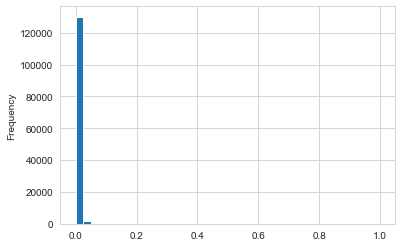

In [31]:
var_info_df.gnomADe_NFE_AF.plot.hist(bins=40)
plt.show()

In [ ]:
plt.hist(var_info_df.gnomADe_NFE_AF < 0.01)

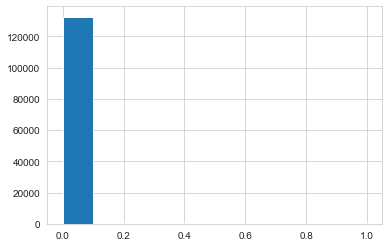

In [26]:
expected_allele_count = 2*(252 * var_info_df.gnomADg_NFE_AF + 71 * var_info_df.gnomADg_ASJ_AF +
                           8 * var_info_df.gnomADg_MID_AF + 3 * var_info_df.gnomADg_AMR_AF +
                           1 * var_info_df.gnomADg_AFR_AF + 1 * var_info_df.gnomADg_SAS_AF)
expected_allele_freq = expected_allele_count / (2 * 336)
plt.hist(expected_allele_freq)
plt.show()

In [25]:
252+71+8+3+1+1

336

In [27]:
np.sum(expected_allele_freq >= 1/(2*336))

22947

In [28]:
np.mean(expected_allele_freq >= 1/(2*336))

0.17020219252050853

In [15]:
var_info_df.gnomADe_NFE_AF.isna().sum()

105

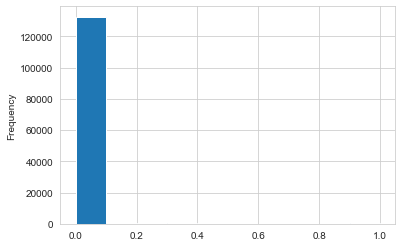

In [16]:
var_info_df.gnomADe_NFE_AF.plot.hist()
plt.show()

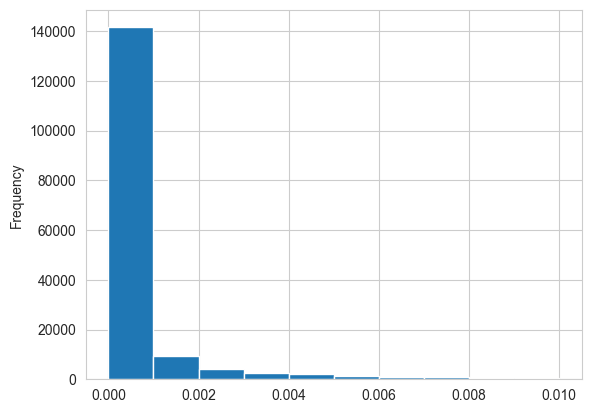

In [49]:
var_info_df.gnomADe_NFE_AF[var_info_df.gnomADe_NFE_AF <= 0.01].plot.hist()
plt.show()

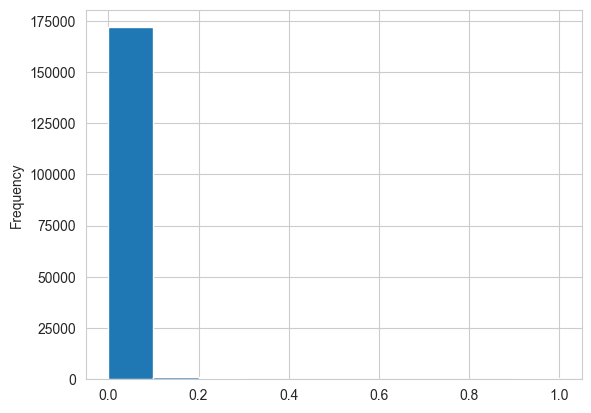

In [46]:
var_info_df.gnomADg_NFE_AF.plot.hist()
plt.show()